# Problem 1

Write a function which plots the solutions to a (complex) polynomial $$f(z) = a_n z^n + \cdots + a_1 z + a_0$$

In [3]:
def plot_roots(f):
    #HINT: use f.roots() to find roots! Type f.roots?
    return

## A solution

A few notes 

* The code `R.<z> = CDF[]` says that R is polynomials in a variable $z$ and the coefficients are in `CDF`. This `CDF` stands for C (i.e. $\CC$, the complex numbers) and DF stands for Double Field. This basically just means that we are storing a complex number as a decimal approximation. If we had used `CC[]` it would store $\sqrt(2)$ as an exact expression for this square root.  So in `CC` we have that $\sqrt 2 ^2 = 2$ but in `CDF` maybe $\sqrt 2 ^2  = 2.000000001$. 
* The `multiplicities = False` option is nice. Here it lets us return the roots as a list `[r1, r2, ...]` whereas if we had done it without this option it would have returned `[(r1, 1), (r2, 1)]` keeping track of how many factors of $(z- r_1)$ are in the polynomial $f$. 

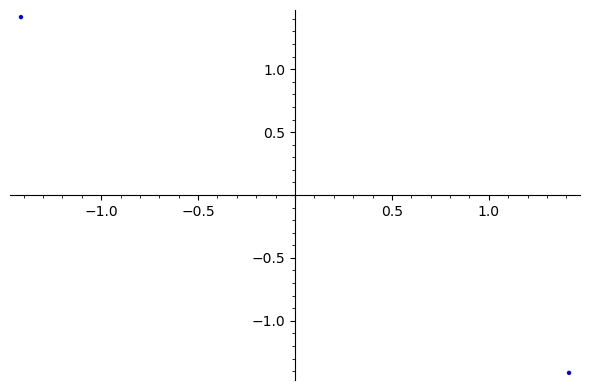

In [67]:
R.<z> = CDF[]
f(z) = z^2 + 4*I
def plot_roots(f, color = 'blue'):
    #HINT: use f.roots() to find roots! Type f.roots?
    roots = f.roots(multiplicities = False)
    points = [point((a.real(), a.imag()), color = color) for a in roots ]
    return sum(points)
show(plot_roots(f))

## A slightly better solution

For technical reasons we actually want a slightly better solution that gives more accurate numerical solutions to the problem. This uses the python library numpy. You can ignore this and just use the function, pretending it was the previous one. 


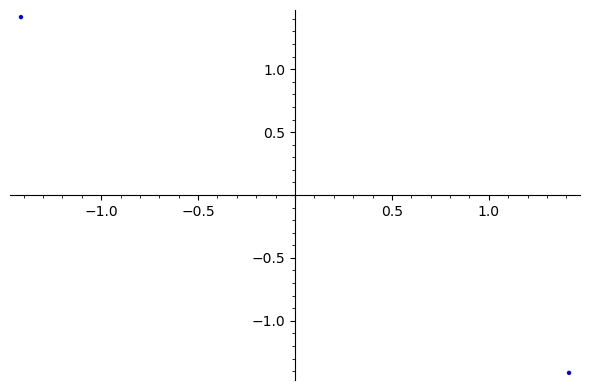

In [162]:
R.<z> = CDF[]
f(z) = z^2 + 4*I
import numpy as np
import numpy.polynomial.polynomial as poly
def plot_roots_N(f, color = 'blue'):
    j=np.complex(0,1)
    cs = np.array(R(f).coefficients(sparse=False)) # gets the coefficients of the polynomial f
    roots_candidates = [CDF(a) for a in list(poly.polyroots(cs))]# poly.polyroots finds the roots numerically. CDF makes the sage CDFs
    roots = [a for a in roots_candidates if abs(f(z = a)) < 0.1]
    points = [point((a.real(), a.imag()), color = color) for a in roots ]
    return sum(points)

plot_roots_N(R(f(z)))

-------------

# Problem 2

Recall that we said the Mandelbrot set was the points $c$ such that $$f(f(\cdots f(0))) \to \infty$$
this means it is the points $c$ such that $0$ is in the interior of the Julia set of $f$. What does the Julia set of $z^2 + c$ look like when 

* c is in the interior of $M$
* c is near the boundary of $M$
* c is outside of $M$

In [2]:
# Hint: use julia_plot(interact = True)

# A solution

The basic idea is that the there is a second description of the mandelbrot set (we are maybe being a little bit loose when the points $c$ are at the boundary of $M$ ). Namely, 

* a point $c$ is in $M$ is the (filled) Julia set $J(z^2 + c)$ is **connected**, 
* it is outside of $M$ if the Julia set $J(z^2 + c)$ is a bunch of disconnected points
* it is near the boundary if it looks like it is barely connected - there are almost no interior points of $J(z^2 + c)$. Notice that it's very very difficult to find a point actually on the boundary. 

A few examples are shown below for values 
$$ c \in \{ -0.63 + 0.446i ,-0.63 + 0.5i , -0.61 + 0.42i\}$$

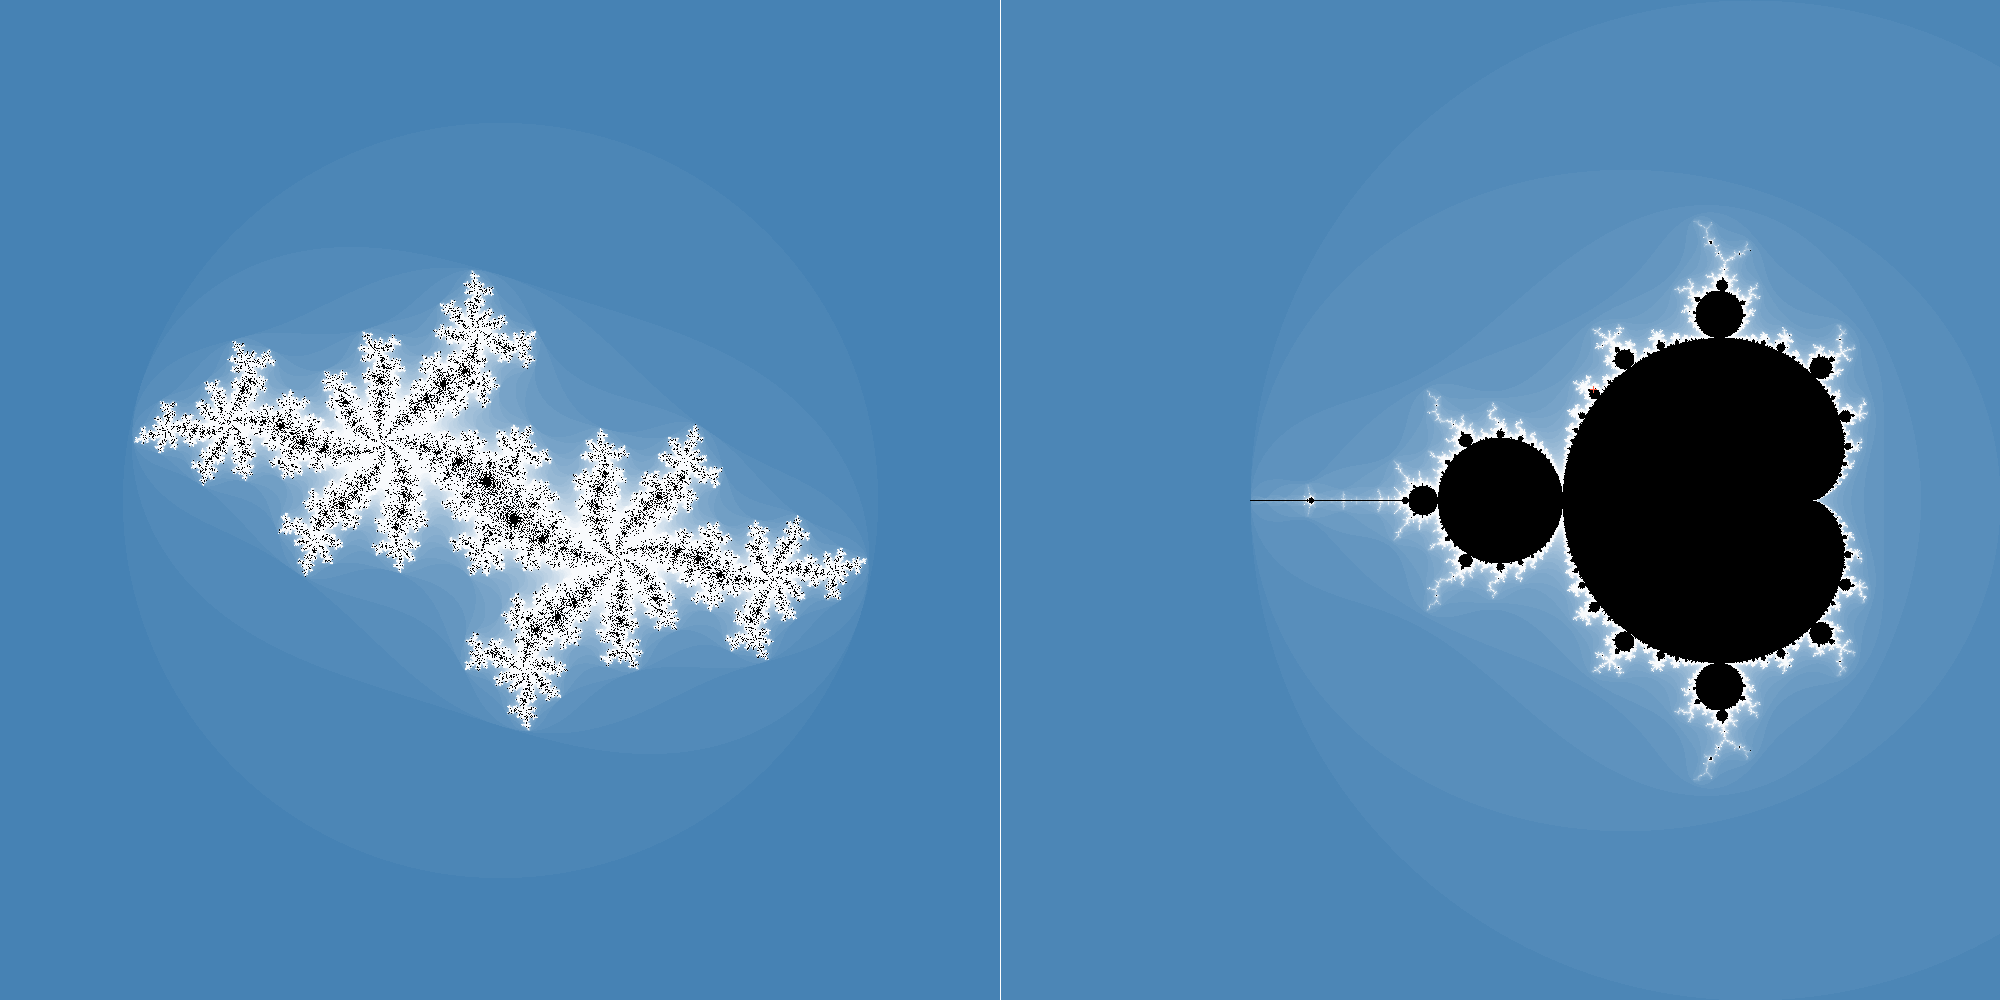

In [47]:
R.<z> = CDF[]
julia_plot(z^2 -0.63 + 0.44487*I, max_iteration = 10000, pixel_count = 1000)

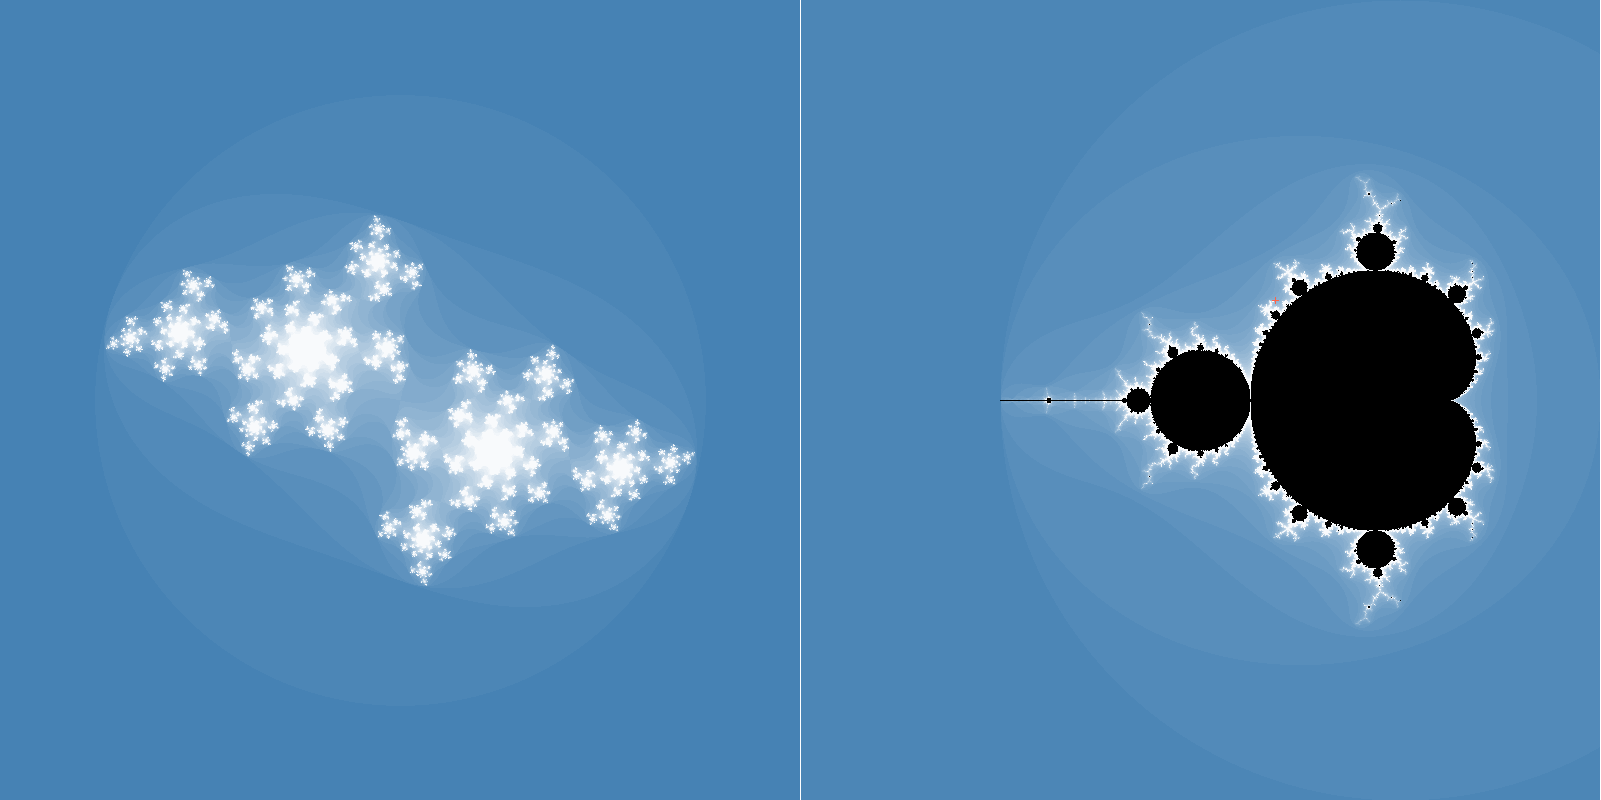

In [49]:
julia_plot(z^2 -0.63 + 0.5*I, max_iteration = 1000, pixel_count = 800)

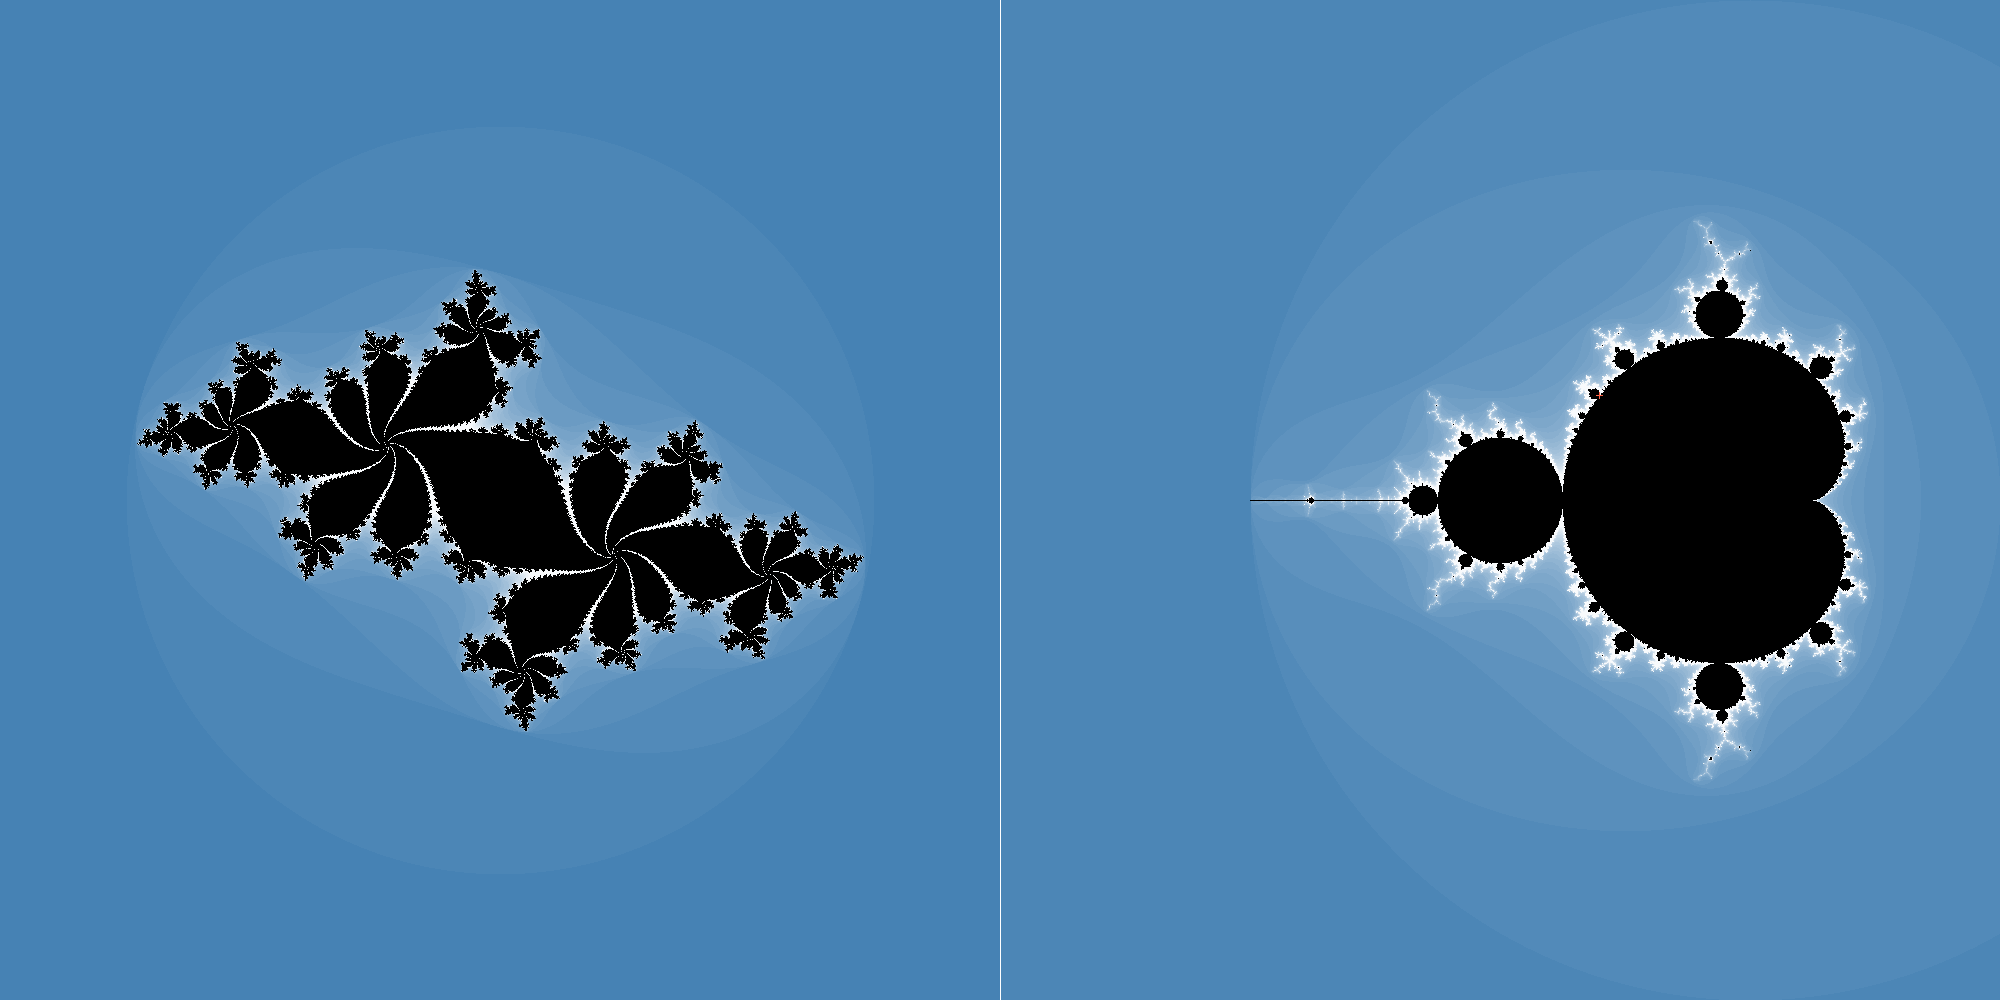

In [50]:
julia_plot(z^2 -0.61 + 0.42*I, max_interation = 10000, pixel_count = 1000)

--------

# Problem 3

How do you find points $z$ such that $f^n(z) = z$? Plot the julia set for $f$ alongside all such points for a given $n$. 

# A solution 

So the first example to consider is just $ n = 1$. We are looking for points where $f(z) = z$. These are points *fixed* by $z \mapsto f(z)$. In particular they are *inside* the interior of the Julia set. We do this just by solving 
$f(z) -z = 0$, which is the polynomial equation 
$$z^2 + c - z = 0.$$ We can plot these roots as before, using the plot roots function.

    R.<z> = CDF[]
    f(z) = z^2 + 4*I
    show(plot_roots_N(f))
    
The general solution for plotting the roots isn't much harder (if we are allowed to use a computer to find them). We use use the (degree $2^n$) polynomial $f(f(\cdots f(z)))$ and plot its roots. E.g. for $ n = 3$ we do 

    R.<z> = CDF[]
    f(z) = z^2 + 4*I
    show(plot_roots_N(f(f(f(z))) - z))
    
Actually this gives an error because for some reason f gets turned into something no longer in `R` so we apply it to `R(f(f(f(z))) - z)` instead. This just tells sage to make `f(f(f(z))) - z` and element of `CDF[]`. See an example below. 

#### Why do we want to do this? 

Because points $z$ such that $f^n(z) = z$ are **periodic** points. They again remain bounded as we continue to iterate (do you see why?) and their structure/stability is often related to the structure of the Julia set itself. 
    

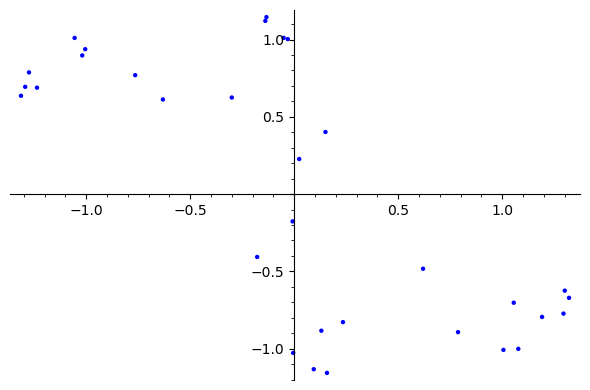

In [136]:
R.<z> = CDF[]
f = z^2 + I
show(plot_roots_N(R(f(f(f(f(f(z))))) -z)))

## Plotting with Julia set

Because sage computes the mandelbrot plot using C and returns it as a bitmap (it would take way too long otherwise) it's actually a bit of a pain to combine it with graphics from the rest of sage. I have written a function that takes a graphics object in sage (e.g. points, plots, etc.) and combines them with a Julia or mandelbrot plot. In particular we can look at fixed and periodic points over the set.

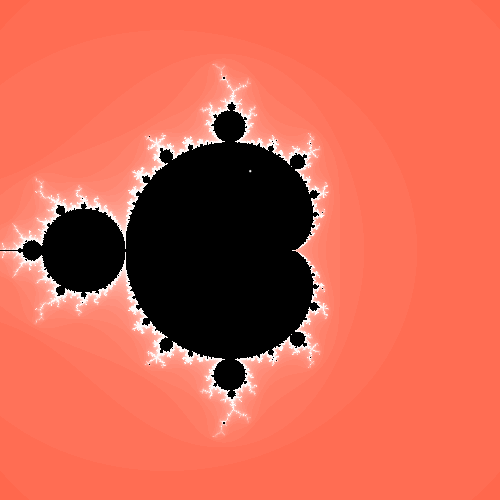

In [152]:
from PIL import Image as pilimg

def plot_with_julia(graphics, f, **kwds):
    """
    This function returns a plot of the graphics overlayed with the julia set of the function f
    
    -- graphics: a sage graphics object, e.g. points
    
    -- f : A polynomial, e.g. z^2 + 0.25
    
    -- **kwds: the same keywords as for julia_plot()
    
    EXAMPLE ::
    
    sage: a = point((0,0), color='red')
    sage: R.<z> = CDF[]
    sage: f = z^2 + 0.25
    sage: plot_with_julia(a, f)
    
    """
    kwdscopy = dict(kwds)
    x_center = kwds.pop("x_center", 0.0)
    y_center = kwds.pop("y_center", 0.0)
    image_width = kwds.pop("image_width", 4.0)
    pixel_count = kwds.pop("pixel_count", 500)
    xmax = x_center + image_width*0.5
    xmin = x_center - image_width*0.5
    ymax = y_center + image_width*0.5
    ymin = y_center - image_width*0.5
    graphics.save("./tmp/g.png", transparent = True, axes=False, xmin=xmin, xmax = xmax, ymin = ymin, ymax = ymax, aspect_ratio = 1, figsize = [10,10])
    julia = julia_plot(f, mandelbrot = False, **kwdscopy)
    julia_modified = julia.pil.convert('RGBA')
    mod = pilimg.open('./tmp/g.png')
    mod_resized = mod.resize((julia.height(), julia.width()))
    julia_modified.alpha_composite(mod_resized)
    return julia_modified

def plot_with_mandelbrot(graphics, **kwds):
    """
    This function returns a plot of the graphics overlayed with the mandelbrot set
    
    -- graphics: a sage graphics object, e.g. points

    -- **kwds: the same keywords as for julia_plot()
    
    EXAMPLE ::
    
    sage: a = point((0,0.25), color='white')
    sage: plot_with_mandelbrot(a, image_width = 3.0, pixel_count = 1000)
    
    """
    kwdscopy = dict(kwds)
    x_center = kwds.pop("x_center", 0.0)
    y_center = kwds.pop("y_center", 0.0)
    image_width = kwds.pop("image_width", 4.0)
    pixel_count = kwds.pop("pixel_count", 500)
    xmax = x_center + image_width*0.5
    xmin = x_center - image_width*0.5
    ymax = y_center + image_width*0.5
    ymin = y_center - image_width*0.5
    graphics.save("./tmp/g.png", transparent = True, axes=False, xmin=xmin, xmax = xmax, ymin = ymin, ymax = ymax, aspect_ratio = 1, figsize = [10,10])
    m = mandelbrot_plot(**kwdscopy)
    m_modified = m.pil.convert('RGBA')
    mod = pilimg.open('./tmp/g.png')
    mod_resized = mod.resize((m.height(), m.width()))
    m_modified.alpha_composite(mod_resized)
    return m_modified


a = point((0,.5), color = 'white')
plot_with_mandelbrot(a,  image_width = 3.0)

# Plotting Julia sets with fixed and periodic points

FINALLY, we can plot a julia set together with the fixed points of $z \mapsto f^n(z)$, i.e. the periodic points of order $n$. We'll write a function which uses what we have from before and plots these points. I.e. we use our functions `plot_roots` and `plot_with_julia` and combine them to produce a graph with these points. Also we have a function using lambda notation and a ternary operator to quickly iterate functions (google 'python ternary' and 'python lambda', or just use the function)

    iterate  = lambda g , n: f  if n ==1 else g(z = (iterate(g, n-1)))
    
so that `iterate(g,n)` is the composition `g(g(...(g(z))))` with $n$ iterations. 


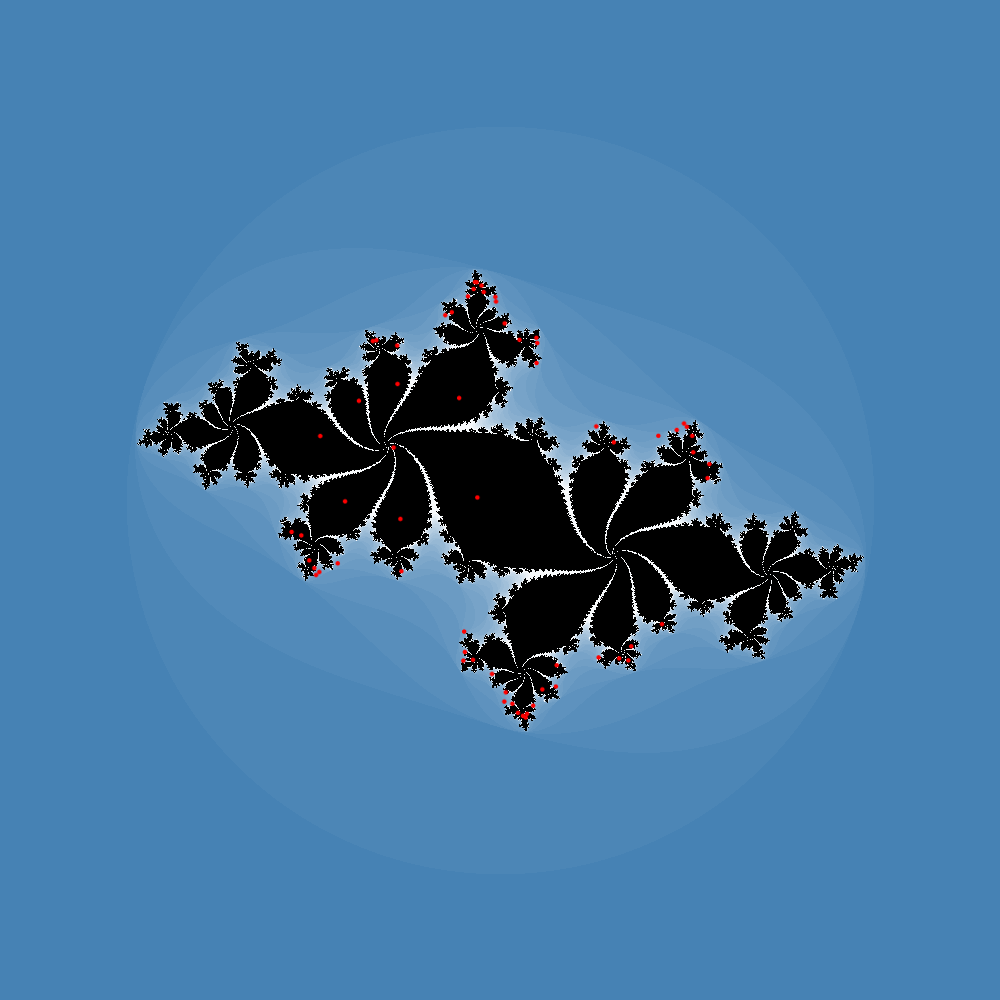

In [166]:
R.<z> = CDF[]
#f = R(z^2 -0.1225 + 0.7558*I)
#f = R(z^2 + CDF(1/4*e^(2*pi*I/3) - 1))
f = R(z^2 -0.61 + 0.42*I)
def plot_julia_with_periodic_points(f, period, **kwds):
    iterate = lambda g , n: f if n ==1 else g(z = iterate(g, n-1))
    root_plot = plot_roots_N(R(iterate(f, period) - z), color = 'red')
    return plot_with_julia(root_plot, f, **kwds)
plot_julia_with_periodic_points(f, 7, pixel_count = 1000)